In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Kaggle\ Competition/kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c playground-series-s5e6

playground-series-s5e6.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/playground-series-s5e6.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Data Analysis

In [ ]:
train_df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [ ]:
train_df.shape

(750000, 10)

In [ ]:
train_df.describe()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [ ]:
train_df['Fertilizer Name'].unique()

array(['28-28', '17-17-17', '10-26-26', 'DAP', '20-20', '14-35-14',
       'Urea'], dtype=object)

In [ ]:
train_df['Fertilizer Name'].value_counts()

,count
Fertilizer Name,
14-35-14,114436
10-26-26,113887
17-17-17,112453
28-28,111158
20-20,110889
DAP,94860
Urea,92317


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           250000 non-null  int64 
 1   Temparature  250000 non-null  int64 
 2   Humidity     250000 non-null  int64 
 3   Moisture     250000 non-null  int64 
 4   Soil Type    250000 non-null  object
 5   Crop Type    250000 non-null  object
 6   Nitrogen     250000 non-null  int64 
 7   Potassium    250000 non-null  int64 
 8   Phosphorous  250000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 17.2+ MB


In [ ]:
train_df.isna().sum()

,0
id,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


In [ ]:
test_df.isna().sum()

,0
id,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0


# Data Preprocessing

In [ ]:
train_df.drop(columns=['id'], inplace=True)
test_df.drop(columns=['id'], inplace=True)

In [ ]:
train_df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,27,69,65,Sandy,Millets,30,6,18,28-28
2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,35,58,43,Red,Paddy,37,2,16,DAP


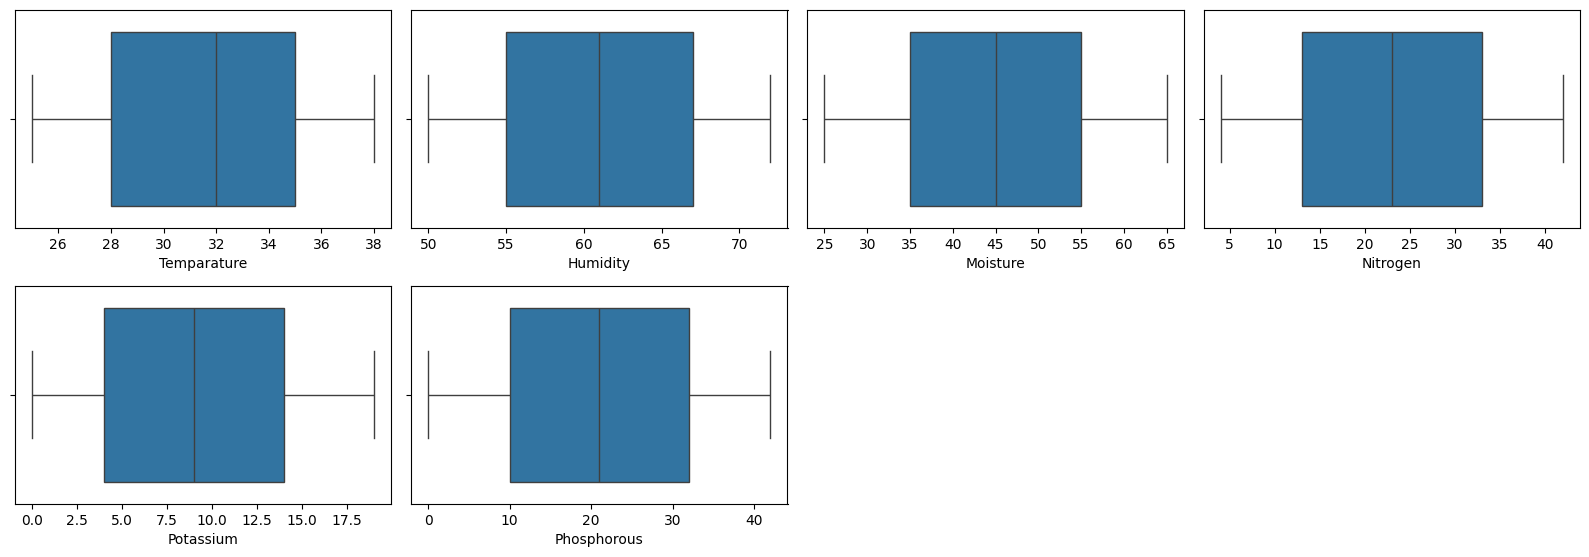

In [ ]:
array = train_df.select_dtypes(exclude='object').columns
plt.figure(figsize=(16,8))
for i in range(len(array)):
  plt.subplot(3,4,(i+1))
  sns.boxplot(data=train_df, x=f'{array[i]}')

plt.tight_layout()
plt.show()

In [ ]:
train_df.select_dtypes(exclude='object').skew()

,0
Temparature,-0.002024
Humidity,-0.008055
Moisture,-0.018151
Nitrogen,-0.006144
Potassium,-0.003872
Phosphorous,-0.009530


In [ ]:
train_df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,27,69,65,Sandy,Millets,30,6,18,28-28
2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,35,58,43,Red,Paddy,37,2,16,DAP


In [ ]:
train_df['Soil Type'].unique()

array(['Clayey', 'Sandy', 'Red', 'Loamy', 'Black'], dtype=object)

# For Tree Algo

In [ ]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
train_df['Soil Type'] = le1.fit_transform(train_df['Soil Type'])
test_df['Soil Type'] = le1.transform(test_df['Soil Type'])

In [ ]:
le2 = LabelEncoder()
train_df['Crop Type'] = le2.fit_transform(train_df['Crop Type'])
test_df['Crop Type'] = le2.transform(test_df['Crop Type'])

In [ ]:
le3 = LabelEncoder()
train_df['Fertilizer Name'] = le3.fit_transform(train_df['Fertilizer Name'])

In [ ]:
train_df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,70,36,1,8,36,4,5,4
1,27,69,65,4,4,30,6,18,4
2,29,63,32,4,4,24,12,16,2
3,35,62,54,4,0,39,12,4,0
4,35,58,43,3,6,37,2,16,5


In [ ]:
test_df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,31,70,52,4,10,34,11,24
1,27,62,45,3,8,30,14,15
2,28,72,28,1,2,14,15,4
3,37,53,57,0,2,18,17,36
4,31,55,32,3,7,13,19,14


In [ ]:
# sns.pairplot(data = train_df.sample(10000), hue='Fertilizer Name')

In [ ]:
X_train = train_df.drop(columns='Fertilizer Name')
y_train = train_df['Fertilizer Name']
X_test = test_df

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(750000, 8)
(750000,)
(250000, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

# Removed scaling for y_train as it is the target variable for classification
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.values.flatten())

ValueError: Expected 2D array, got 1D array instead:
array=[4. 4. 2. ... 0. 3. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_train

array([[ 0.57966219],
       [ 0.57966219],
       [-0.43710232],
       ...,
       [-1.45386683],
       [ 0.07127994],
       [ 1.5964267 ]])

In [ ]:
y_train.flatten()

array([ 0.57966219,  0.57966219, -0.43710232, ..., -1.45386683,
        0.07127994,  1.5964267 ])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# Get class probabilities for each test instance
probs = rf_model.predict_proba(X_test)  # returns a list of arrays if >2 classes

# Get top 3 class indices for each prediction
top3_preds = np.argsort(probs, axis=1)[:, -3:][:, ::-1]  # sort, take top 3, and reverse (high to low)

In [ ]:
top3_preds

In [ ]:
le3.inverse_transform(top3_preds.flatten())

In [ ]:
# === 4. Predict class probabilities ===
probs = rf_model.predict_proba(X_test)  # shape: (num_samples, num_classes)

# === 5. Get top-3 predicted class indices ===
top3_indices = np.argsort(probs, axis=1)[:, -3:][:, ::-1]  # sort → take top 3 → reverse

# === 6. Map indices to class names ===
class_names = le3.classes_
top3_class_names = class_names[top3_indices]

# === 7. Convert to space-separated strings ===
top3_strings = [" ".join(row) for row in top3_class_names]


In [ ]:
# Generate the ID column starting from 750000
ids = range(750000, 750000 + len(top3_strings))

# Create the DataFrame
df_out = pd.DataFrame({
    "id": ids,
    "Fertilizer Name": top3_strings
})

# Save as space-separated CSV
df_out.to_csv("/content/pred.csv", index=False, header=True)


In [ ]:
dd = pd.read_csv('/content/pred.csv')
dd

# ANN

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1,1))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))  # output layer

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


In [ ]:
# === 1. Predict softmax probabilities ===
y_probs = model.predict(X_test)  # shape = (num_samples, num_classes)

In [ ]:
y_probs.shape

In [ ]:
# === 2. Get top-3 class indices ===
top3_indices = tf.argsort(y_probs, axis=1, direction='DESCENDING')[:, :3].numpy()

In [ ]:
top3_indices

In [ ]:
# === 3. Convert indices to class names ===
# Assume you used LabelEncoder to encode your labels
# If not, use: class_names = np.unique(y_train)
class_names = le3.classes_
top3_class_names = class_names[top3_indices]

In [ ]:
# === 4. Create DataFrame for saving ===
# Join top-3 predictions into a space-separated string per row
top3_strings = [" ".join(row) for row in top3_class_names]

In [ ]:
# Generate the ID column starting from 750000
ids = range(750000, 750000 + len(top3_strings))

# Create the DataFrame
df_out = pd.DataFrame({
    "id": ids,
    "Fertilizer Name": top3_strings
})

# Save as space-separated CSV
df_out.to_csv("/content/pred.csv", index=False, header=True)


In [ ]:
df = pd.read_csv('/content/pred.csv')
df

# StratifedKFold with Random Forest

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold
import numpy as np

# === StratifiedKFold setup ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_top3_preds = []
all_ids = []

# === Loop through folds ===
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Define the model
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X_train_fold.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7, activation='softmax'))  # output layer

    # Compile
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=128, validation_split=0.2)

    # === Predict probabilities on validation set ===
    y_prob = model.predict(X_val_fold)

    # === Get top-3 class indices ===
    top3_indices = tf.argsort(y_prob, axis=1, direction='DESCENDING')[:, :3].numpy()

    # === Map indices to original class labels ===
    top3_labels_flat = le3.inverse_transform(top3_indices.flatten())
    top3_labels = top3_labels_flat.reshape(-1, 3)

    # === Format predictions as space-separated strings ===
    top3_strings = [" ".join(row) for row in top3_labels]

    # === Collect results with IDs starting from 750000 ===
    fold_ids = list(range(750000 + len(all_ids), 750000 + len(all_ids) + len(top3_strings)))
    all_top3_preds.extend(top3_strings)
    all_ids.extend(fold_ids)

# === Final DataFrame ===
df_out = pd.DataFrame({
    "id": all_ids,
    "Fertilizer Name": all_top3_preds
})

# === Save as space-separated CSV ===
df_out.to_csv("/content/ann_stratified_top3.csv", index=False, header=True)

In [ ]:
dff = pd.read_csv('/content/ann_stratified_top3.csv')
dff